In [1]:
import tensorflow as tf

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Extract dataset and label them as train and test sets

In [2]:
train_X = sio.loadmat('/Users/johannes/Downloads/Capstone Project v2/SVHN Datasets/Format 2/train_32x32.mat')['X']
train_y = sio.loadmat('/Users/johannes/Downloads/Capstone Project v2/SVHN Datasets/Format 2/train_32x32.mat')['y']

test_X = sio.loadmat('/Users/johannes/Downloads/Capstone Project v2/SVHN Datasets/Format 2/test_32x32.mat')['X']
test_y = sio.loadmat('/Users/johannes/Downloads/Capstone Project v2/SVHN Datasets/Format 2/test_32x32.mat')['y']

# Print the shape of the images

In [3]:
shape_train_X = train_X.shape
shape_test_X = test_X.shape

print 'Training shape: ', shape_train_X
print 'Testing shape: ', shape_test_X

Training shape:  (32, 32, 3, 73257)
Testing shape:  (32, 32, 3, 26032)


# Pixel intensity statistical analysis

In [4]:
print 'Maximum pixel intensity(training data): ', np.max(train_X)
print 'Minimum pixel intensity(training data): ', np.min(train_X)
print 'Mean pixel intensity(training data): ', np.mean(train_X)
print 'Median pixel intensity(training data): ', np.median(train_X)
print 'Standard deviation pixel intensity(training data): ', np.std(train_X)

Maximum pixel intensity(training data):  255
Minimum pixel intensity(training data):  0
Mean pixel intensity(training data):  115.111779669
Median pixel intensity(training data):  111.0
Standard deviation pixel intensity(training data):  50.8192679062


In [5]:
print 'Maximum pixel intensity(test data): ', np.max(test_X)
print 'Minimum pixel intensity(test data): ', np.min(test_X)
print 'Mean pixel intensity(test data): ', np.mean(test_X)
print 'Median pixel intensity(test data): ', np.median(test_X)
print 'Standard deviation pixel intensity(test data): ', np.std(test_X)

Maximum pixel intensity(test data):  255
Minimum pixel intensity(test data):  0
Mean pixel intensity(test data):  116.781171171
Median pixel intensity(test data):  114.0
Standard deviation pixel intensity(test data):  57.3763665964


# Plot frequency distribution graph (determine class distribution)

In [6]:
train_data = train_y.reshape(shape_train_X[3]).tolist()
train_data = dict(Counter(train_data))

In [7]:
train_data

{1: 13861,
 2: 10585,
 3: 8497,
 4: 7458,
 5: 6882,
 6: 5727,
 7: 5595,
 8: 5045,
 9: 4659,
 10: 4948}

In [8]:
plt.bar(range(len(train_data)), train_data.values(), align='center', color='green', label='Train Data')
plt.xticks(range(len(train_data)), train_data.keys())

([<matplotlib.axis.XTick at 0x11471bc50>,
 <a list of 10 Text xticklabel objects>)

In [9]:
test_data = test_y.reshape(shape_test_X[3]).tolist()
test_data = dict(Counter(test_data))

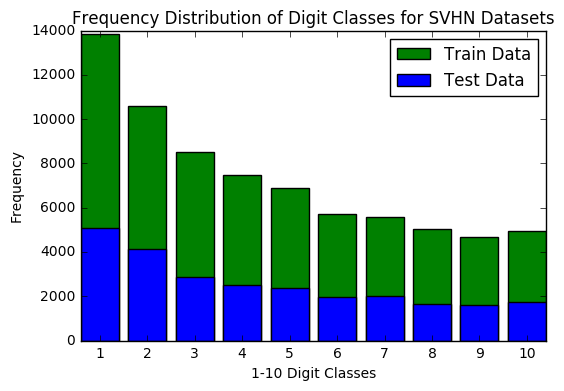

In [10]:
plt.bar(range(len(test_data)), test_data.values(), align='center', color='blue', label='Test Data')
plt.legend()

plt.xlabel('1-10 Digit Classes')
plt.ylabel('Frequency')

plt.title('Frequency Distribution of Digit Classes for SVHN Datasets')

plt.show()

# Normalize the datasets via (Pixel - 128) / 128 formula

In [11]:
train_X = (train_X.astype('float32') - 128.0 ) / 128.0 
test_X = (test_X.astype('float32') - 128.0) / 128.0

# Perform one hot encoding

In [12]:
def onehot_encoding(data, data_label):
    data_size = data.shape[3]
    
    training_list = []
    class_list = []
    
    for x in xrange(data_size):
        training_list.append(data[:,:,:,x])
        
    for i in data_label:
        label_zeros = np.zeros(10)
        
        if i == 1:
            label_zeros[1] = 1
        elif i == 2:
            label_zeros[2] = 1
        elif i == 3:
            label_zeros[3] = 1
        elif i == 4:
            label_zeros[4] = 1
        elif i == 5:
            label_zeros[5] = 1
        elif i == 6:
            label_zeros[6] = 1
        elif i == 7:
            label_zeros[7] = 1
        elif i == 8:
            label_zeros[8] = 1
        elif i == 9:
            label_zeros[9] = 1
        elif i == 10:
            label_zeros[0] = 1
            
        class_list.append(label_zeros)
    
    class_list = np.asarray(class_list)
    training_list = np.asarray(training_list)
        
    return training_list, class_list

In [13]:
train_X, train_y = onehot_encoding(train_X, train_y)
test_X, test_y = onehot_encoding(test_X, test_y)

# Design convolutional neural network

In [14]:
# Train dataset
tf_train_dataset = tf.placeholder(tf.float32, shape=(None, 32, 32, 3))

# Train labels
tf_train_labels = tf.placeholder(tf.float32, shape=(None, 10))

# Test dataset
tf_test_dataset = tf.constant(test_X)

In [15]:
image_size = 32
dropout = 0.9
batch = 16
learning_rate = 0.001

patch_size = 5
patch_stride = 1
pool_size = 2
pool_stride = 2

# Filter channels and depth for CONV 1
conv1_channels = 3
conv1_depth = 32

# Filter channels and depth for CONV 2
conv2_channels = 32
conv2_depth = 64

In [16]:
# Weight and biases for RELU 1
weight_conv1 = tf.Variable(tf.truncated_normal([patch_size, patch_size, conv1_channels, conv1_depth], stddev=0.1))
bias_conv1 = tf.Variable(tf.constant(1.0, shape=[conv1_depth]))

# Weight and biases for RELU 2
weight_conv2 = tf.Variable(tf.truncated_normal([patch_size, patch_size, conv2_channels, conv2_depth], stddev=0.1))
bias_conv2 = tf.Variable(tf.constant(1.0, shape=[conv2_depth]))

# Weight and biases for RELU 3
weight_fc1 = tf.Variable(tf.truncated_normal([8 * 8 * conv2_depth, 128], stddev=0.1))
bias_fc1 = tf.Variable(tf.constant(1.0, shape=[128]))

# Weight and biases for fully connected layer
weight_fc2 = tf.Variable(tf.truncated_normal([128, 10], stddev=0.1))
bias_fc2 = tf.Variable(tf.constant(1.0, shape=[10]))

dropout = tf.placeholder(tf.float32)

In [17]:
def cnn_model(data):
    # First layer: Convolution 1 
    conv_1 = tf.nn.conv2d(data, weight_conv1, strides=[1, patch_stride, patch_stride, 1], padding='SAME')
    
    # Second layer: ReLu 1
    # Output = 32x32x16 due to 16 filters being used
    relu_1 = tf.nn.relu(conv_1 + bias_conv1)
    
    # Third layer: Max Pool 1 with 2x2 filter and a stride of 2
    # Output = 16x16x16
    maxpool_1 = tf.nn.max_pool(relu_1, ksize=[1, pool_size, pool_size, 1], strides=[1, pool_stride, pool_stride, 1], padding='SAME')
    
    # Fourth layer: Convolution 2
    conv_2 = tf.nn.conv2d(maxpool_1, weight_conv2, strides=[1, patch_stride, patch_stride, 1], padding='SAME')
    
    # Fifth layer: ReLu 2
    # Output = 16x16x16 due to 16 filters being used
    relu_2 = tf.nn.relu(conv_2 + bias_conv2)
    
    # Sixth layer: Max Pool 2 with 2x2 filter and a stride of 2
    # Output = 8x8x16
    maxpool_2 = tf.nn.max_pool(relu_2, ksize=[1, pool_size, pool_size, 1], strides=[1, pool_stride, pool_stride, 1], padding='SAME')

    # Reshape the output to [128, 10]
    shape = maxpool_2.get_shape().as_list()
    reshape = tf.reshape(maxpool_2, [-1, shape[1] * shape[2] * shape[3]])
    
    # Seventh layer: ReLu 3
    relu_3 = tf.nn.relu(tf.matmul(reshape, weight_fc1) + bias_fc1)
    
    # Final layer: Dropout
    dropout_layer = tf.nn.dropout(relu_3, 0.9)
    
    return tf.matmul(dropout_layer, weight_fc2) + bias_fc2

# Utilize Adam/Gradient Descent optimizer

In [18]:
logits = cnn_model(tf_train_dataset)

# Cross entropy loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))

# Adam Optimizer
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

# Gradient Descent Optimizer
# optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [19]:
train_prediction = tf.nn.softmax(logits)
test_prediction = tf.nn.softmax(cnn_model(tf_test_dataset))

# Accuracy test

In [20]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

In [21]:
total_epochs = 1000
# total_epochs = 5000
# total_epochs = 10000
# total_epochs = 15000
# total_epochs = 20000

In [22]:
with tf.Session() as session:
    tf.initialize_all_variables().run()
    
    print('Machine learning model training is in progress...')
    
    total_train_accuracy = 0
    total_test_accuracy = 0
    
    # Training datasets
    for epoch in range(total_epochs):
        # Develop batch from the training set
        offset = (epoch * batch) % (train_y.shape[0] - batch)
        batch_data = train_X[offset:(offset + batch), :, :, :]
        batch_labels = train_y[offset:(offset + batch), :]
        
        # Feed dictionary to TensorFlow session
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, dropout: 0.9}
        _, loss_values, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
    
        # Train accuracy
        train_batch_accuracy = accuracy(predictions, batch_labels)
        
        if (epoch % 100 == 0):
            print('Batch loss at epoch %d: %f' % (epoch, loss_values))
            print('Batch train accuracy: %.1f%%' % train_batch_accuracy)
            
        total_train_accuracy += train_batch_accuracy
    
    average_train_accuracy = (total_train_accuracy / total_epochs)
    print 'Average Train Accuracy: ', average_train_accuracy
    print 'Training Ended'
    
    # Test datasets
    for epoch in range(total_epochs):
        # Develop batch from the test set
        offset = (epoch * batch) % (test_y.shape[0] - batch)
        batch_data = test_X[offset:(offset + batch), :, :, :]
        batch_labels = test_y[offset:(offset + batch), :]
        
        # Feed dictionary to TensorFlow session
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, dropout: 0.9}
        _, loss_values, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        
        # Test accuracy
        test_batch_accuracy = accuracy(predictions, batch_labels)
        
        if (epoch % 100 == 0):
            print('Batch loss at epoch %d: %f' % (epoch, loss_values))
            print('Batch test accuracy: %.1f%%' % test_batch_accuracy)
            
        total_test_accuracy  += test_batch_accuracy
        
    average_test_accuracy = (total_test_accuracy / total_epochs)
    print 'Average Test Accuracy: ', average_test_accuracy
    print 'Testing Ended'

Machine learning model training is in progress...
Batch loss at epoch 0: 16.223337
Batch train accuracy: 12.5%
Batch loss at epoch 100: 2.357983
Batch train accuracy: 12.5%
Batch loss at epoch 200: 2.485690
Batch train accuracy: 6.2%
Batch loss at epoch 300: 2.205138
Batch train accuracy: 12.5%
Batch loss at epoch 400: 2.296328
Batch train accuracy: 6.2%
Batch loss at epoch 500: 1.923867
Batch train accuracy: 37.5%
Batch loss at epoch 600: 1.999557
Batch train accuracy: 31.2%
Batch loss at epoch 700: 2.270233
Batch train accuracy: 6.2%
Batch loss at epoch 800: 2.094327
Batch train accuracy: 18.8%
Batch loss at epoch 900: 1.675715
Batch train accuracy: 43.8%
Average Train Accuracy:  22.05
Training Ended
Batch loss at epoch 0: 1.726340
Batch test accuracy: 31.2%
Batch loss at epoch 100: 1.668526
Batch test accuracy: 37.5%
Batch loss at epoch 200: 2.007300
Batch test accuracy: 37.5%
Batch loss at epoch 300: 0.908446
Batch test accuracy: 75.0%
Batch loss at epoch 400: 0.494147
Batch test a